In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df_cleaned = pd.read_csv("new_merged_df.csv")
df_cleaned.head(5)

,Team,Season Success,Games Played,MP,FG,FGA,FG%,3P,3PA,3P%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Playoffs
0,Brooklyn Nets,Eliminated in First Round,82.0,19755.0,42.2,89.0,0.475,11.5,31.9,0.361,...,10.4,34.3,44.7,25.4,7.1,5.5,14.1,20.5,113.6,1
1,Atlanta Hawks,Eliminated in First Round,82.0,19705.0,42.4,90.3,0.470,13.2,35.2,0.374,...,10.3,34.7,45.0,25.2,7.3,4.3,12.1,19.1,116.5,1
2,Chicago Bulls,Eliminated in First Round,82.0,19730.0,42.3,88.2,0.480,10.8,29.3,0.369,...,8.8,34.2,42.9,24.2,7.2,4.2,13.0,19.1,113.2,1
3,Toronto Raptors,Eliminated in First Round,82.0,19855.0,41.9,94.3,0.445,12.3,35.3,0.349,...,13.8,33.0,46.8,22.8,9.3,4.7,12.9,20.2,112.9,1
4,Utah Jazz,Eliminated in First Round,82.0,19730.0,41.7,88.5,0.471,14.9,41.4,0.360,...,11.1,36.5,47.6,23.0,7.4,5.0,14.4,19.4,116.7,1


In [4]:
print(df_cleaned.columns)

Index(['Team', 'Season Success', 'Games Played', 'MP', 'FG', 'FGA', 'FG%',
       '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'Playoffs'],
      dtype='object')


In [6]:
import pandas as pd
from sklearn.cluster import KMeans

# Select the numerical columns for clustering
numerical_columns = ['Games Played', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%',
                     'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']

# Create a new DataFrame with only the numerical columns
df_numerical = df_cleaned[numerical_columns]

# Create an instance of the KMeans model with the desired number of clusters
kmeans = KMeans(n_clusters=3)

# Fit the model to the numerical data
kmeans.fit(df_numerical)

# Get the cluster labels for each data point
cluster_labels = kmeans.labels_

# Add the cluster labels to the original DataFrame
df_cleaned['Cluster'] = cluster_labels


C:\Users\gabri\miniconda3\envs\100days\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\gabri\miniconda3\envs\100days\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [7]:
print(df_cleaned[['Team', 'Cluster']])


                      Team  Cluster
0            Brooklyn Nets        1
1            Atlanta Hawks        1
2            Chicago Bulls        1
3          Toronto Raptors        2
4                Utah Jazz        1
5           Denver Nuggets        0
6   Minnesota Timberwolves        0
7     New Orleans Pelicans        1
8          Milwaukee Bucks        1
9       Philadelphia 76ers        0
10            Phoenix Suns        1
11       Memphis Grizzlies        0
12              Miami Heat        2
13        Dallas Mavericks        1
14          Boston Celtics        2
15   Golden State Warriors        1
16       Charlotte Hornets        2
17        Sacramento Kings        0
18           Orlando Magic        0
19  Portland Trail Blazers        1
20         Houston Rockets        1
21      Los Angeles Lakers        2
22          Indiana Pacers        2
23       San Antonio Spurs        0
24         Detroit Pistons        0
25         New York Knicks        0
26    Los Angeles Clippers  

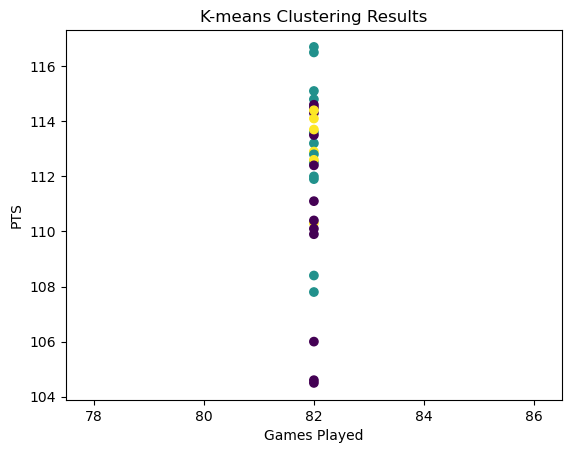

In [8]:
import matplotlib.pyplot as plt

# Assign the cluster labels
cluster_labels = df_cleaned['Cluster']

# Create a scatter plot
plt.scatter(df_cleaned['Games Played'], df_cleaned['PTS'], c=cluster_labels)

# Set the title and labels
plt.title('K-means Clustering Results')
plt.xlabel('Games Played')
plt.ylabel('PTS')

# Display the plot
plt.show()
